## K-Means 분할적 군집화
---
 - 저장된 K만큼 임의의 중심점(Centroid)을 지정
 - 중심점(Centroid)을 기준으로 가까운 거리에 있는 데이터를 하나의 군집으로 묶기
 - 군집마다 다시 중심점(Centroid) 계산
 - 중심점(Centroid) 이동이 더 이상 변경되지 않을때까지 반복하는 방법

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

## [1] 데이터 로딩 및 준비

In [2]:
iris=load_iris()

In [3]:
data=iris.data

In [4]:
data.shape

(150, 4)

In [8]:
data=data[:,:2]
data.shape

(150, 2)

## [2] 데이터 처리

In [118]:
irisCluster=KMeans(n_clusters=4)

In [119]:
irisCluster.fit(data)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [120]:
# cluster 객체 속성 확인
print(f'cluster_centers_:{irisCluster.cluster_centers_}')
print(f'labels:{irisCluster.labels_}')
print(f'labels_count:{np.unique(irisCluster.labels_, return_counts=True)}')

# inertia_값이 낮을수록(수평되는순간) 최적k
print(f'inertia_:{irisCluster.inertia_}')
print(f'n_iter_:{irisCluster.n_iter_}')

cluster_centers_:[[6.85348837 3.1       ]
 [4.76666667 2.89166667]
 [5.1875     3.6375    ]
 [5.90980392 2.73529412]]
labels:[2 1 1 1 2 2 1 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 1 1 2
 2 1 2 2 1 1 2 2 1 2 1 2 2 0 0 0 3 0 3 0 1 0 1 1 3 3 3 3 0 3 3 3 3 3 3 3 3
 0 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 1 3 3 3 3 1 3 0 3 0 3 0 0 1 0 0 0 0
 3 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 3 0 0 0 3 3 3 0 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
labels_count:(array([0, 1, 2, 3]), array([43, 24, 32, 51], dtype=int64))
inertia_:27.9902120383037
n_iter_:7


In [ ]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

inertia_list=[]
for i in range(1, 151):
    irisCluster=KMeans(n_clusters=i)
    irisCluster.fit(data)
    inertia_list.append(irisCluster.inertia_)
    

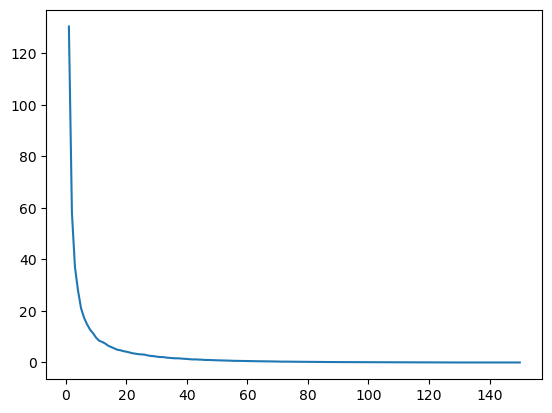

In [107]:
plt.plot(range(1,151), inertia_list)
# plt.scatter(range(1,151), inertia_list)
plt.show()

In [121]:
# 샘플 데이터 -> 결정된 군집을 변환
transiris=irisCluster.transform(data)

In [122]:
transiris

array([[1.79853314, 0.69367179, 0.16298006, 1.11380316],
       [1.95604622, 0.17179607, 0.69933004, 1.04392201],
       [2.15580894, 0.31545822, 0.65502863, 1.29598499],
       [2.25348837, 0.26679684, 0.79628042, 1.35963109],
       [1.91974455, 0.74577514, 0.19121323, 1.25517307],
       [1.65910471, 1.1907339 , 0.3377314 , 1.27139287],
       [2.27336971, 0.53495846, 0.63368959, 1.46881593],
       [1.87760996, 0.55932747, 0.30259296, 1.12675511],
       [2.46162653, 0.36676135, 1.07891728, 1.51876131],
       [1.95348837, 0.24734703, 0.60955927, 1.07364535],
       [1.57245936, 1.02689527, 0.22150056, 1.0911267 ],
       [2.07528661, 0.50942506, 0.45449147, 1.29363776],
       [2.05592181, 0.11334559, 0.74603117, 1.14093556],
       [2.55544573, 0.47907608, 1.09273167, 1.63142204],
       [1.3855821 , 1.51531533, 0.71173204, 1.26946362],
       [1.73796876, 1.7737476 , 0.91872874, 1.67787466],
       [1.65910471, 1.1907339 , 0.3377314 , 1.27139287],
       [1.79853314, 0.69367179,

### 시각화

In [123]:
import pandas as pd
df=pd.DataFrame(data)

In [124]:
data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [125]:
irisCluster.cluster_centers_.shape

(4, 2)

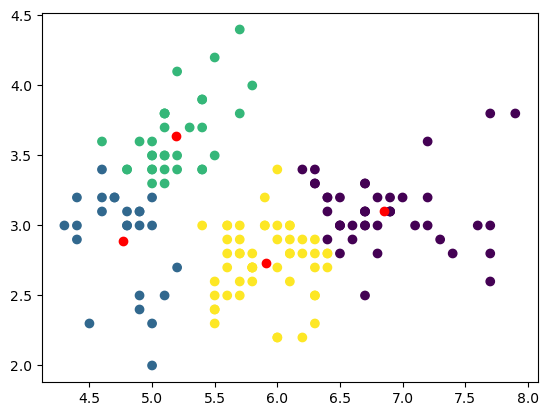

In [126]:
plt.scatter(data[:,0],data[:,1], c=irisCluster.labels_)
for i in range(4):
    plt.plot(irisCluster.cluster_centers_[i][0], irisCluster.cluster_centers_[i][1], 'ro')
# plt.plot(irisCluster.cluster_centers_[1][0], irisCluster.cluster_centers_[1][1], 'bo', label='c1')
# plt.plot(irisCluster.cluster_centers_[2][0], irisCluster.cluster_centers_[2][1], 'go', label='c1')
# plt.plot(irisCluster.cluster_centers_[3][0], irisCluster.cluster_centers_[3][1], 'o', label='c1')
plt.show()

In [ ]:
# plt.scatter(transiris[:,0],transiris[:,1])

## 군집화 성능체크
---
 - 라벨과 데이터를 가지고 지도학습 분류로 성능체크

In [127]:
from sklearn.metrics import silhouette_score

# -1~1사이값, 1이 잘된것 최소 0.5는 넘어야...
silhouette_score(data, irisCluster.labels_, metric='euclidean')

0.4248889536419921

In [128]:
from sklearn.linear_model import LogisticRegression

In [131]:
# 군집화로 생성된 데이터
target=irisCluster.labels_.reshape(-1,1)
target.shape, data.shape

((150, 1), (150, 2))

In [134]:
lrModel=LogisticRegression(random_state=11, max_iter=500)
lrModel.fit(data, irisCluster.labels_)

LogisticRegression(max_iter=500, random_state=11)

In [135]:
pre_label=lrModel.predict(data)

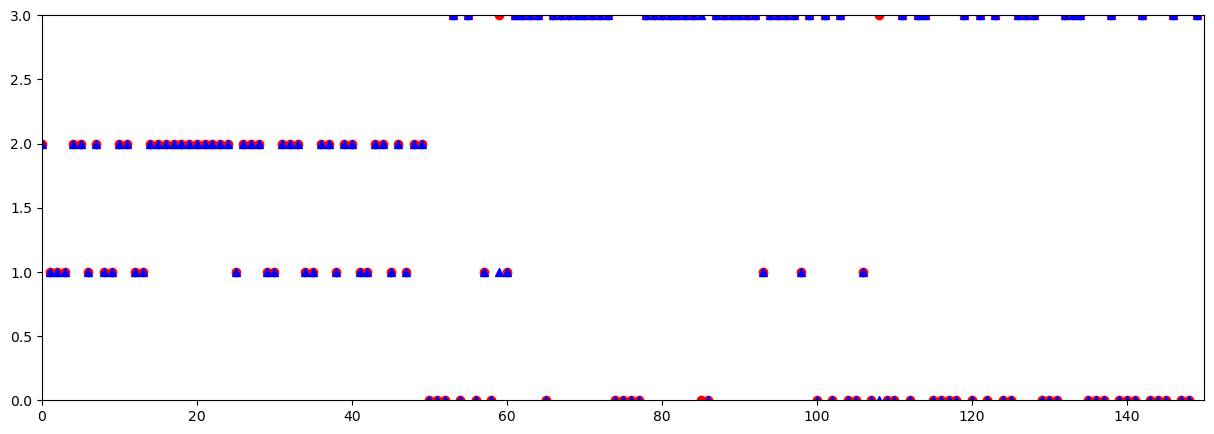

In [142]:
plt.figure(figsize=(15,5))
plt.plot(pre_label, 'ro')
plt.plot(irisCluster.labels_, 'b^')
plt.axis([0,150,0,3])
plt.show()